In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize

We study the energy eigenvalues and eigenstates of a potential well of width $2a$ and depth $V_0$ simmetrically placed around the origin. We compare the results in two cases:
* Infinite domain
* System placed in a box of width $2L$

# Solution in the infinite domain

In this case the system has both bound and unbound solutions. We mainly follow the notation of the book of Gasiorowicz.

In [2]:
V0 = 500
a = 0.5

## Bound state solutions

Outside the potential domain solutions have an exponential behaviour:
$$
\psi(x) = C_1e^{-\mu x} \;\; x > a \quad \psi(x) = C_2e^{\mu x} \;\; x < -a
$$
and $E=-\frac{\mu^2}{2}$. Inside the region of the potential the behavious is oscillatory and it is useful to use the parity symmetry of the potential to separe the solutions in even and odd.

### Even solutions

In this case we have that $\psi(x) = Acos(kx)$ for $|x|<a$. The matching conditions of the wave functions and its derivative at the junction points impose the conditions $\mu= k tan(ka)$. We introduce the auxiliary variables $z=ka$ and $z_0 = \sqrt{2V_0}a^2$ and rewrite the previous condition as (we use the fact that $k^2+\mu^2 = 2V_0)$:
$$
\sqrt{\left(\frac{z_0}{z}\right)^2-1} = tan(z)
$$
and we solve this equation for $z$ (in the range $(0,z_0]$). Once that the solutions are provided we have:
$$
k = \frac{z}{a} \;\;, \mu = \frac{z}{a}tan(z) \;\;, E = -\frac{1}{2}\left(\frac{z}{a}tan(z)\right)^2
$$
Furthermore we have $C_1=C_2=C$ and:
$$
A = \frac{Ce^{-ztan(z)}}{cos(z)}
$$
and $C$ is determined by the normalization condition of the wave function.

In [3]:
z0 = np.sqrt(2*V0)*a
print('z0 = ',z0)

z0 =  15.811388300841896


In [4]:
z = np.linspace(1e-4,z0,1000)

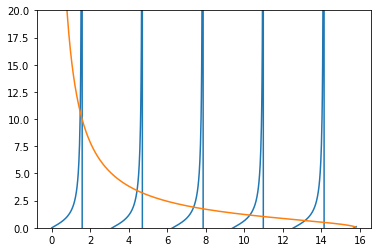

In [5]:
plt.plot(z,np.tan(z))
plt.plot(z,np.sqrt((z0/z)**2-1))
plt.ylim([0,20])
plt.show()

In [6]:
f_sym = lambda x: np.tan(x) - np.sqrt((z0/x)**2-1)

In [7]:
s = np.sign(f_sym(z))

In [8]:
z_zeroes = []
for i in range(len(s)-1):
    if s[i]+s[i+1] == 0:
        zero = optimize.brentq(f_sym, z[i], z[i+1])
        z_zeroes.append(zero)
# cut the spurious solutions
z_zeroes = [z_zeroes[i] for i in range(0,len(z_zeroes),2)]
#z_zeroes

Bound (even) energy levels:

In [9]:
Energy_e = [-0.5*(val/a*np.tan(val))**2 for val in z_zeroes]
print('Number of bound states = ',len(Energy_e))
for i,e in enumerate(Energy_e):
    print('E'+str(i)+' = ',e)

Number of bound states =  6
E0 =  -495.6355739281896
E1 =  -460.7766345332049
E2 =  -391.3914606763265
E3 =  -288.34801385072495
E4 =  -153.91686909426528
E5 =  -2.2720098493715524


Calculation of the wave functions

In [10]:
k_e = [val/a for val in z_zeroes]
mu_e = [val/a*np.tan(val) for val in z_zeroes]
C_e = [1 for val in z_zeroes]
C_e = []
for val in z_zeroes:
    num = np.exp(2*val*np.tan(val))
    den = a*(1.0/(np.cos(val)**2)+np.sin(val)/(val*np.cos(val))+1.0/(val*np.tan(val)))
    C_e.append(np.sqrt(num/den))
A_e = [] 
for i,val in enumerate(z_zeroes):
    A_e.append(C_e[i]*np.exp(-val*np.tan(val))/np.cos(val))

In [11]:
x = np.linspace(-2*a,2*a,1000)

In [12]:
def psi_e(i,x):
    out = 0.0
    if x <= -a: out = C_e[i]*np.exp(mu_e[i]*x)
    if x > -a and x <= a: out =  A_e[i]*np.cos(k_e[i]*x)
    if x > a: out = C_e[i]*np.exp(-mu_e[i]*x)
    return out

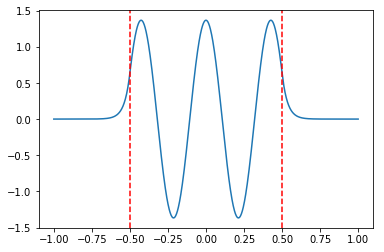

In [13]:
nstate = 2
psival = [psi_e(nstate,val) for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

Numerical check of the normalization of the wavefunction

In [14]:
inte = 0.0
dx = x[1]-x[0]
for p in psival:
    inte += p**2
inte = inte*dx
print(inte)

1.000000101831613


## Unbound state solutions

We build the unbound solution obtained for $E>0$.

### Solutions travelling from the left

Following Gasiorowicz we build solutions "from the left". This means that the wave function is parametrized as follows:
$$
\psi(x) = e^{i k x} + R e^{-ikx} \;\;, x < -a \\
\psi(x) = A e^{i q x} + B e^{-i q x} \;\;, -a< x < a \\
\psi(x) = T e^{i k x} \;\;, x > a
$$
The Schroedinger equation imposes that:
$$
\frac{k^2}{2} = E = \frac{q^2}{2} - V_0
$$
We can parametrize the solution in function of $E$ so that:
$$
k = \sqrt{2E} \;\;, \quad q = \sqrt{2(E+V_0)} 
$$

We propose a solution based on the numerical analysis of the matching of wave function and its derivative:
$$
-e^{ika}R+0+e^{-iqa}A+e^{iqa}B = -e^{ika} \\
ik e^{ika}R+0+iqe^{-iqa}A-iqe^{iqa}B = ike^{-ika} \\
0-e^{ika}T+e^{iqa}A+e^{-iqa}B = 0 \\
0+ike^{ika}T-iqe^{iqa}A+iqe^{-iqa}B = 0
$$
We write this system of equation as $M(E)*C(E) = b(E)$ where C(E) is the column array $[R,T,A,B]$

In [17]:
def k(E): return np.sqrt(2*E)

def q(E): return np.sqrt(2*(E+V0))

def M(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    M = np.array([[-ek,0,1.0/eq,eq],[1j*k(E)*ek,0,1j*q(E)/eq,-1j*q(E)*eq],[0,ek,-eq,-1.0/eq],[0,1j*k(E)*ek,-1j*q(E)*eq,1j*q(E)/eq]])
    return M

def b(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    return np.array([1.0/ek,1j*k(E)/ek,0,0])

def psi_uL(E,C,x):
    out = 0.0
    if x <= -a: out = np.exp(1j*k(E)*x)+C[0]*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  C[2]*np.exp(1j*q(E)*x)+C[3]*np.exp(-1j*q(E)*x)
    if x > a: out = C[1]*np.exp(1j*k(E)*x)
    return out

True
|R(E)|^2 = 0.5941488434418412
|T(E)|^2 = 0.40585115655815884
 sum = 1.0


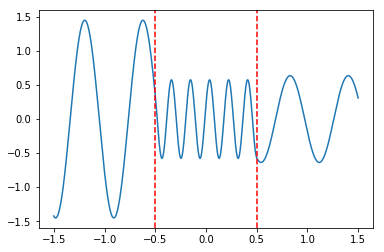

In [18]:
E = 60
C = np.linalg.solve(M(E), b(E))
print(np.allclose(np.dot(M(E), C), b(E)))
print('|R(E)|^2 =', np.absolute(C[0])**2)
print('|T(E)|^2 =', np.absolute(C[1])**2)
print(' sum =', np.absolute(C[1])**2+np.absolute(C[0])**2)
x = np.linspace(-3*a,3*a,1000)
#psival = [np.absolute(psi_uL(E,C,val)) for val in x]
psival = [psi_uL(E,C,val).real for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

We can sum a left and right solution:

In [19]:
def psi_uLR(E,C,x):
    out = 0.0
    if x <= -a: out = np.exp(1j*k(E)*x)+(C[0]+C[1])*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  (C[2]+C[3])*2.0*np.cos(q(E)*x)
    if x > a: out = np.exp(-1j*k(E)*x)+(C[0]+C[1])*np.exp(1j*k(E)*x)
    return out

True


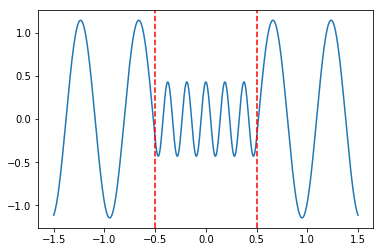

In [20]:
E = 60
C = np.linalg.solve(M(E), b(E))
print(np.allclose(np.dot(M(E), C), b(E)))
x = np.linspace(-3*a,3*a,1000)
#psivalLR = [np.absolute(psi_uLR(E,C,val)) for val in x]
psivalLR = [psi_uLR(E,C,val).real for val in x]
plt.plot(x,psivalLR)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

In [21]:
print(C[0]+C[1],(C[2]+C[3])*2.0)

(-0.343978169696477-0.9389776455125336j) (0.43019423860357253-0.6157459319458113j)


### Even solution

We directly build a symmetric solution (that however is always complex!). We look for a solution of the form: 
$$
\psi(x) = e^{i k x} + A e^{-ikx} \;\;, x < -a \\
\psi(x) = B cos(q x) \;\;, -a< x < a \\
\psi(x) = e^{-i k x} + A e^{ikx} \;\;, x > a
$$
We write the equations of the boundary conditions. The four equations are equal in pairs and so we obtain two equations for A and B:
$$
-e^{ika}A+cos(qa)B = e^{-ika} \\
ike^{ika}A+Bsin(qa) = ike^{-ika}
$$
The two equations can be solved analitically:
$$
A = \frac{e^{-2ika}(ik-tan(qa))}{ik+tan(qa)} \\
B = \frac{e^{-ika}+Ae^{ika}}{cos(qa)}
$$

In [22]:
def k(E): return np.sqrt(2*E)

def q(E): return np.sqrt(2*(E+V0))

def A(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    return 1.0/ek**2*(1j*k(E)-np.tan(q(E)*a))/(1j*k(E)+np.tan(q(E)*a))

def B(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    return (1.0/ek + A(E)*ek)/np.cos(q(E)*a)

def C(E): return np.array([A(E),B(E)])

def psi_ue(E,CC,x):
    out = 0.0
    if x <= -a: out = np.exp(1j*k(E)*x)+CC[0]*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  CC[1]*np.cos(q(E)*x)
    if x > a: out = np.exp(-1j*k(E)*x)+CC[0]*np.exp(1j*k(E)*x)
    return out

In [23]:
# Check the solution
E = 60
CC = C(E)
print(np.allclose(-np.exp(1j*k(E)*a)*CC[0]+np.cos(q(E)*a)*CC[1],np.exp(-1j*k(E)*a)))
print(np.allclose(1j*k(E)*np.exp(1j*k(E)*a)*CC[0]+np.sin(q(E)*a)*CC[1],1j*k(E)*np.exp(-1j*k(E)*a)))

True
True


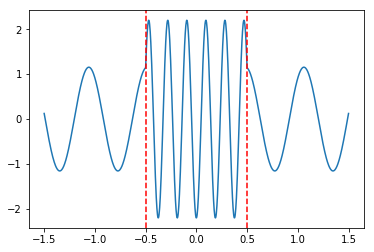

In [24]:
E = 60
CC = C(E)
x = np.linspace(-3*a,3*a,1000)
#psivalLR = [np.absolute(psi_ue(E,CC,val)) for val in x]
psival = [psi_ue(E,CC,val).real for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

In [25]:
CC

array([-0.33316788+0.94286752j, -2.20082986-3.1118642 j])

In [26]:
def M(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    M = np.array([[-ek,np.cos(q(E)*a)],[1j*k(E)*ek,np.sin(q(E)*a)]])
    return M

def b(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    return np.array([1.0/ek,1j*k(E)/ek])

In [27]:
E = 60
CC = np.linalg.solve(M(E), b(E))
print(CC)
# Check the solution
print(np.allclose(-np.exp(1j*k(E)*a)*CC[0]+np.cos(q(E)*a)*CC[1],np.exp(-1j*k(E)*a)))
print(np.allclose(1j*k(E)*np.exp(1j*k(E)*a)*CC[0]+np.sin(q(E)*a)*CC[1],1j*k(E)*np.exp(-1j*k(E)*a)))

[-0.33316788+0.94286752j -2.20082986-3.1118642 j]
True
True


 qualcosa non torna ma non capisco cosa....

In [26]:
#################################################################################################

### Even solutions

We look for solutions of the form:
$$
\psi(x) = A cos(qx) \;\; |x| > a \;,\quad \psi(x) = B cos(kx) \;\; |x| < a
$$
The Schroedinger equation imposes that:
$$
\frac{q^2}{2} = E = \frac{k^2}{2} - V_0
$$
We can parametrize the solution in function of $E$ so that:
$$
q = \sqrt{2E} \;\;, \quad k = \sqrt{2(E+V_0)} 
$$

The matching conditions of the wave functions and its derivative at the junction points impose that:
$$
B = A \frac{cos(qa)}{cos(ka)} \;\;, \quad q tan(qa) = k tan(ka)
$$

In [27]:
# A = 1
def q(E): return np.sqrt(2*E)

def k(E): return np.sqrt(2*(E+V0))

def B(E): return np.cos(q(E)*a)/np.cos(k(E)*a)

def psi_ue(E,x):
    out = 0.0
    if x <= -a: out = np.cos(q(E)*x)
    if x > -a and x <= a: out =  B(E)*np.cos(k(E)*x)
    if x > a: out = np.cos(q(E)*x)
    return out

In [28]:
psi_ue(1,1)

0.15594369476537437

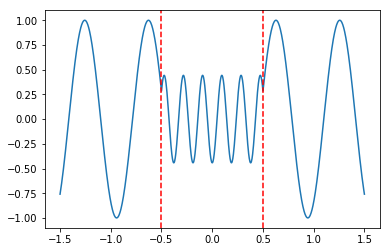

In [29]:
Eval = 50
x = np.linspace(-3*a,3*a,1000)
psival = [psi_ue(Eval,val) for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

There is a problem with the continuity of the derivative....maybe it is not meaningfull to look for real wave function in this case....

Solutions are parametrized in function of the energy so that:
$$
k = \sqrt{2E} \;, \quad q = \sqrt{2(E+V_0)}
$$
The reflection and transimission coefficients are expressed as:
$$
R = i e^{-2ika} \frac{(q^2-k^2)sin(2qa)}{2kq cos(2qa) - i(q^2+k^2)sin(2qa)} \\
T = e^{-2ika} \frac{2kq}{2kq cos(2qa) - i(q^2+k^2)sin(2qa)}
$$
and the A,B coefficients are given by:
$$
A = \frac{e^{-ika} + R e^{ika} - T e^{ia(2q+k)}}{e^{-iqa}-e^{3iqa}} \\
B = \frac{T e^{ika} - Ae^{iqa}}{e^{-iqa}}
$$


In [30]:
def k(E): return np.sqrt(2*E)

def q(E): return np.sqrt(2*(E+V0))

def R(E): 
    num = 1j*np.exp(2j*k(E)*a)*(q(E)**2-k(E)**2)*np.sin(2*q(E)*a)
    den = 2*k(E)*q(E)*np.cos(2*q(E)*a)-1j*(q(E)**2+k(E)**2)*np.sin(2*q(E)*a)
    return num / den

def T(E): 
    num = np.exp(-2j*k(E)*a)*2*k(E)*q(E)
    den = 2*k(E)*q(E)*np.cos(2*q(E)*a)-1j*(q(E)**2+k(E)**2)*np.sin(2*q(E)*a)
    return num / den

def A(E):
    num = np.exp(-1j*k(E)*a)+R(E)*np.exp(1j*k(E)*a)-T(E)*np.exp(1j*(2*q(E)+k(E))*a)
    den = np.exp(-1j*q(E)*a)-np.exp(3j*q(E)*a)
    return num / den

def B(E):
    num = T(E)*np.exp(1j*k(E)*a)-A(E)*np.exp(1j*q(E)*a)
    den = np.exp(-1j*q(E)*a)
    return num / den

def psi_uL(E,x):
    out = 0.0
    if x <= -a: out = np.exp(1j*k(E)*x)+R(E)*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  A(E)*np.exp(1j*q(E)*x)+B(E)*np.exp(-1j*q(E)*x)
    if x > a: out = T(E)*np.exp(1j*k(E)*x)
    return out

|R(E)|^2 = 0.5941488434418415
|T(E)|^2 = 0.4058511565581587


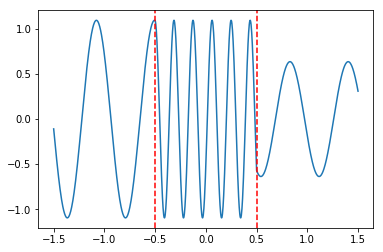

In [31]:
Eval = 60
print('|R(E)|^2 =', np.absolute(R(E))**2)
print('|T(E)|^2 =', np.absolute(T(E))**2)
x = np.linspace(-3*a,3*a,1000)
#psival = [np.absolute(psi_uL(Eval,val)) for val in x]
psival = [psi_uL(Eval,val).real for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

In [32]:
E = 50
eq1 = np.exp(-1j*k(E)*a)+R(E)*np.exp(1j*k(E)*a)-(A(E)*np.exp(-1j*q(E)*a)+B(E)*np.exp(1j*q(E)*a))
eq2 = 1j*k(E)*(np.exp(-1j*k(E)*a)-R(E)*np.exp(1j*k(E)*a))-1j*q(E)*(A(E)*np.exp(-1j*q(E)*a)-B(E)*np.exp(1j*q(E)*a))
print(eq1,eq2)

(-1.9984014443252818e-15+1.4432899320127035e-15j) (-1.6174959732524083-10.40490739669659j)


We propose a solution based on the numerical analysis of the matching of wave function and its derivative:
$$
-e^{ika}R+0+e^{-iqa}A+e^{iqa}B = -e^{ika} \\
ik e^{ika}R+0+iqe^{-iqa}A-iqe^{iqa}B = ike^{-ika} \\
0-e^{ika}T+e^{iqa}A+e^{-iqa}B = 0 \\
0+ike^{ika}T-iqe^{iqa}A+iqe^{-iqa}B = 0
$$
We write this system of equation as $M(E)*C(E) = b(E)$ where C(E) is the column array $[R,T,A,B]$

In [33]:
def k(E): return np.sqrt(2*E)

def q(E): return np.sqrt(2*(E+V0))

def M(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    M = np.array([[-ek,0,1.0/eq,eq],[1j*k(E)*ek,0,1j*q(E)/eq,-1j*q(E)*eq],[0,ek,-eq,-1.0/eq],[0,1j*k(E)*ek,-1j*q(E)*eq,1j*q(E)/eq]])
    return M

def b(E):
    ek = np.exp(1j*k(E)*a)
    eq = np.exp(1j*q(E)*a)
    return np.array([1.0/ek,1j*k(E)/ek,0,0])

def psi_uL(E,C,x):
    out = 0.0
    if x <= -a: out = np.exp(1j*k(E)*x)+C[0]*np.exp(-1j*k(E)*x)
    if x > -a and x <= a: out =  C[2]*np.exp(1j*q(E)*x)+C[3]*np.exp(-1j*q(E)*x)
    if x > a: out = C[1]*np.exp(1j*k(E)*x)
    return out

True
|R(E)|^2 = 0.5941488434418412
|T(E)|^2 = 0.40585115655815884
 sum = 1.0


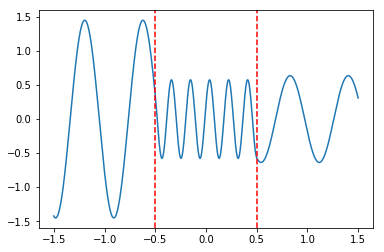

In [34]:
E = 60
C = np.linalg.solve(M(E), b(E))
print(np.allclose(np.dot(M(E), C), b(E)))
print('|R(E)|^2 =', np.absolute(C[0])**2)
print('|T(E)|^2 =', np.absolute(C[1])**2)
print(' sum =', np.absolute(C[1])**2+np.absolute(C[0])**2)
x = np.linspace(-3*a,3*a,1000)
#psival = [np.absolute(psi_uL(E,C,val)) for val in x]
psival = [psi_uL(E,C,val).real for val in x]
plt.plot(x,psival)
plt.axvline(x=-a, color='r', linestyle='--')
plt.axvline(x=a, color='r', linestyle='--')

In [35]:
from sympy import *

In [36]:
x = Symbol('x')
a = Symbol('a')
k = Symbol('k')

In [37]:
y = cos(x)**2

In [38]:
integrate(y,x)

x/2 + sin(x)*cos(x)/2